In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from tensorflow import keras
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

base_dir = "/content/drive/MyDrive/Colab Notebooks/Project4"
filenames = os.listdir(base_dir)
filenames = filenames[::-1]

In [ ]:
#10-11월 데이터를 train set
train = []
for file in filenames[1:3]:
  image_num = os.listdir(f"/content/drive/MyDrive/Colab Notebooks/Project4/{file}")
  for i in range(len(image_num)-2):
    train.append(np.load(f"/content/drive/MyDrive/Colab Notebooks/Project4/{file}/{i}.npy"))

#12월 데이터를 test set
test = []
image_num = os.listdir(f"/content/drive/MyDrive/Colab Notebooks/Project4/{filenames[3]}")
for i in range(len(image_num)-2):
    test.append(np.load(f"/content/drive/MyDrive/Colab Notebooks/Project4/{filenames[3]}/{i}.npy"))

In [ ]:
#구글 드라이브 용량 제한으로 2018년 9월, 10월, 11월, 12월 데이터만 업로드 후 가져왔고 RAM 터짐 문제로 인해 9월 데이터는 사용 x
train = np.array(train)
print('train data shape', train.shape)
test = np.array(test)
print('test data shape', test.shape)

train data shape (5855, 768, 768)
test data shape (2974, 768, 768)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

def plt_image_animation(frames, update_func):
    fig, ax = plt.subplots(figsize=(4,4))
    plt.axis('off')
    anim = animation.FuncAnimation(fig, update_func, frames=frames)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

In [ ]:
plt_image_animation(15, lambda t : plt.imshow(train[t]))

In [ ]:
#9-10월 연계성 체크
sample1 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M09/2879.npy")
sample2 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M10/0.npy")

#10-11월 연계성 체크
sample3 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M10/2975.npy")
sample4 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M11/0.npy")

#11-12월 연계성 체크
sample5 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M11/2878.npy")
sample6 = np.load("/content/drive/MyDrive/Colab Notebooks/Project4/2018M12/0.npy")

Text(0.5, 1.0, '2018M10/0.npy')

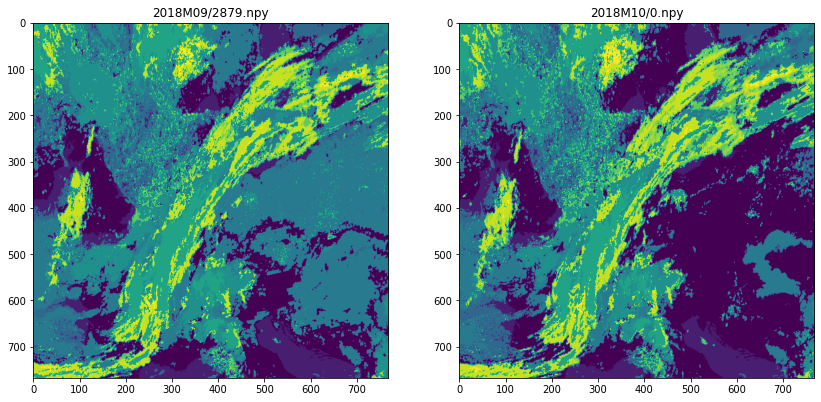

In [ ]:
figure = plt.figure(figsize= (14, 7))
plt.subplot(121)
plt.imshow(sample1)
plt.title('2018M09/2879.npy')

plt.subplot(122)
plt.imshow(sample2)
plt.title('2018M10/0.npy')

Text(0.5, 1.0, '2018M11/0.npy')

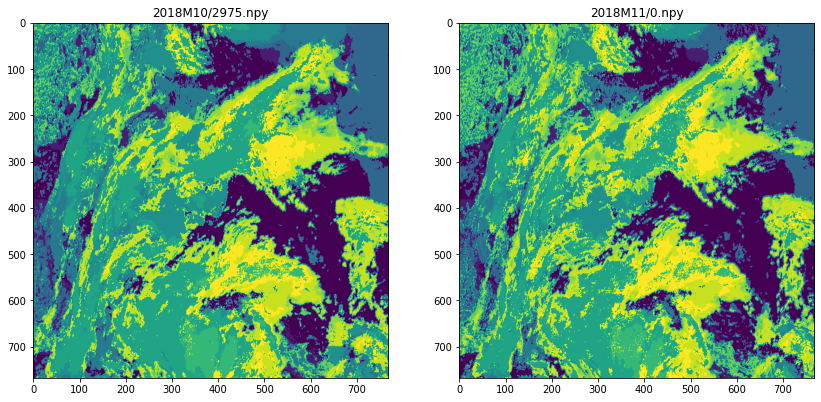

In [ ]:
figure = plt.figure(figsize= (14, 7))
plt.subplot(121)
plt.imshow(sample3)
plt.title('2018M10/2975.npy')

plt.subplot(122)
plt.imshow(sample4)
plt.title('2018M11/0.npy')

Text(0.5, 1.0, '2018M12/0.npy')

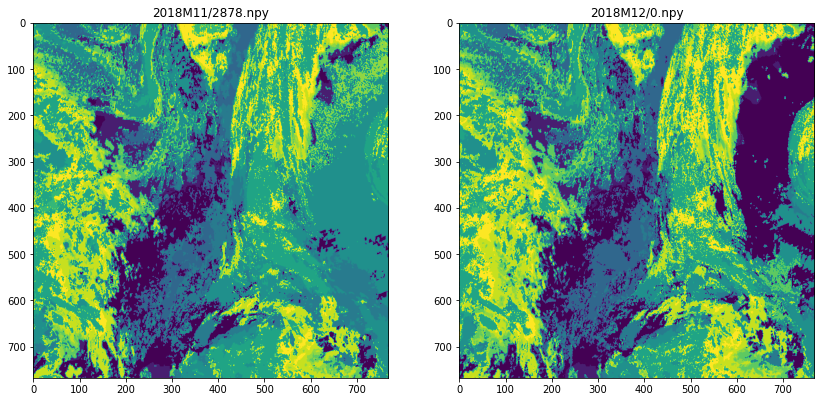

In [ ]:
figure = plt.figure(figsize= (14, 7))
plt.subplot(121)
plt.imshow(sample5)
plt.title('2018M11/2878.npy')

plt.subplot(122)
plt.imshow(sample6)
plt.title('2018M12/0.npy')

Text(0.5, 1.0, '+60 min')

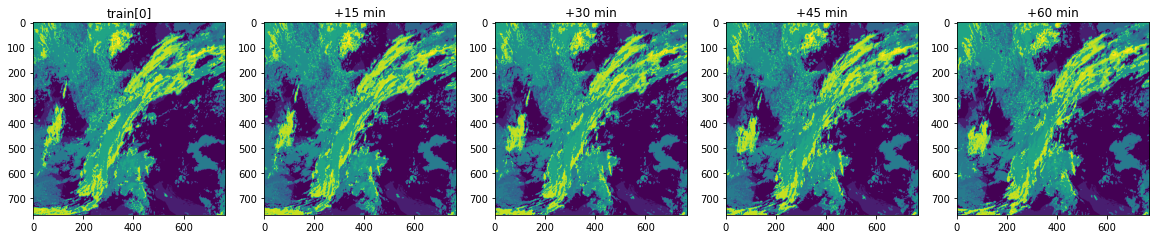

In [ ]:
figure = plt.figure(figsize= (20, 4))
plt.subplot(151)
plt.imshow(train[0])
plt.title('train[0]')

plt.subplot(152)
plt.imshow(train[1])
plt.title('+15 min')

plt.subplot(153)
plt.imshow(train[2])
plt.title('+30 min')

plt.subplot(154)
plt.imshow(train[3])
plt.title('+45 min')

plt.subplot(155)
plt.imshow(train[4])
plt.title('+60 min')

In [ ]:
train = np.expand_dims(train, axis=-1)
print(train.shape)
test = np.expand_dims(test, axis=-1)
print(test.shape)

(5855, 768, 768, 1)
(2974, 768, 768, 1)


In [ ]:
train = np.expand_dims(train, axis=0)
print(train.shape)
test = np.expand_dims(test, axis=0)
print(test.shape)

(1, 5855, 768, 768, 1)
(1, 2974, 768, 768, 1)


In [ ]:
def create_shifted_frames(data):
    x = data[:, 0:data.shape[1] - 1, :, :, :]
    y = data[:, 1:data.shape[1], :, :, :]
    return x, y

In [ ]:
x_train, y_train = create_shifted_frames(train)
x_test, y_test = create_shifted_frames(test)

In [ ]:
#Model
from tensorflow.keras import layers

def model():
  inp = layers.Input(shape=(None, 768, 768, 1))

  x = layers.ConvLSTM2D(filters=64, kernel_size=(5, 5), padding="same", return_sequences=True, activation="relu")(inp)
  x = layers.BatchNormalization()(x)

  x = layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), padding="same", return_sequences=True, activation="relu")(x)
  x = layers.BatchNormalization()(x)

  x = layers.ConvLSTM2D(filters=64, kernel_size=(1, 1), padding="same", return_sequences=True, activation="relu")(x)
  x = layers.BatchNormalization()(x)

  x = layers.Conv3D(filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same")(x)

  model = keras.models.Model(inp, x)

  return model

In [ ]:
model = model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 768, 768,   0         
                             1)]                                 
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 768, 768, 6  416256    
                             4)                                  
                                                                 
 batch_normalization (BatchN  (None, None, 768, 768, 6  256      
 ormalization)               4)                                  
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 768, 768, 6  295168    
                             4)                                  
                                                                 
 batch_normalization_1 (Batc  (None, None, 768, 768, 6  256  

In [ ]:
# Callback함수 정의
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# 하이퍼파라미터 정의
epochs = 20
batch_size = 32

# 학습
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/20
